In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [19]:
data = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [20]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
data.shape

(5572, 5)

In [24]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [25]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
data = data.rename({'v1':'Class','v2': 'Message'}, axis = 1)
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


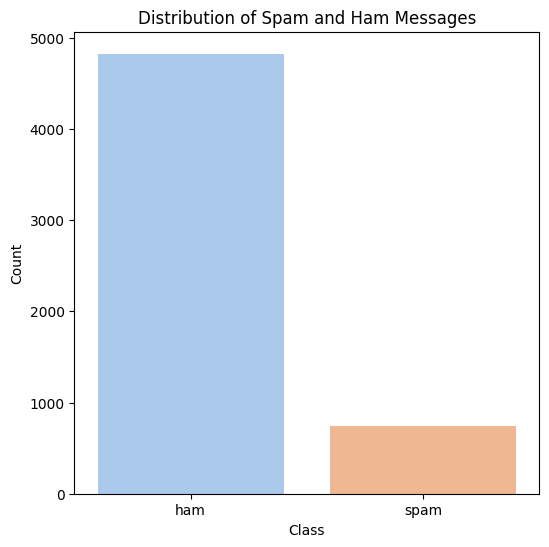

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Class', data=data, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

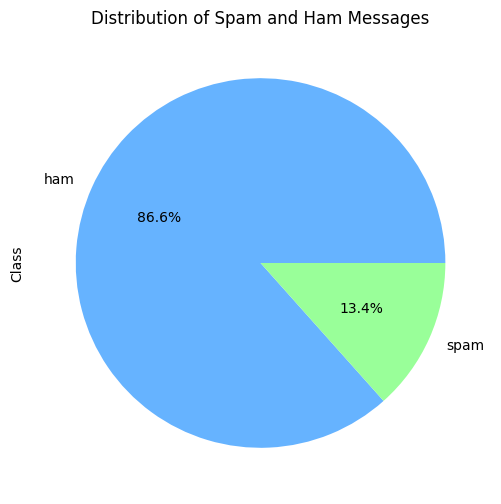

In [28]:
plt.figure(figsize=(6,6))
data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [29]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
  text = re.sub(r'\s+',' ',text)
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  return text

In [31]:
data['clean_text'] = data['Message'].apply(clean_text)
data.head()

,Class,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [34]:
X = data['clean_text']
y = data['Class']


In [36]:
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import string
ps=PorterStemmer
words=word_tokenize('clean_text')

In [38]:
def message_text_process(mess):
  no_punctuation = [char for char in mess if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [39]:
data['Message'].head(5).apply(message_text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [40]:
bag_of_words_transformer=CountVectorizer(analyzer=message_text_process).fit(data['Message'])
print(len(bag_of_words_transformer.vocabulary_))

11304


In [41]:
message_bagofwords = bag_of_words_transformer.transform(data['Message'])

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(message_bagofwords)

In [43]:
message_tfidf = tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 11304)


In [44]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model = MultinomialNB().fit(message_tfidf, data['Class'])

In [45]:
from sklearn.naive_bayes import MultinomialNB
spam_detection_model=MultinomialNB().fit(message_tfidf,data['Class'])

In [46]:
message = data['Message'][3]
bag_of_words_for_message = bag_of_words_transformer.transform([message])
tfidf = tfidf_transformer.transform(bag_of_words_for_message)

predicted_class = spam_detection_model.predict(tfidf)[0]
result_message = f'The message is predicted as {predicted_class.upper()}.'
print(result_message)

The message is predicted as HAM.


In [48]:
! pip install scikit-plot

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [51]:
def Model(model, X, y):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(12,8),title_fontsize=12,text_fontsize=16)
    plt.show()

    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)


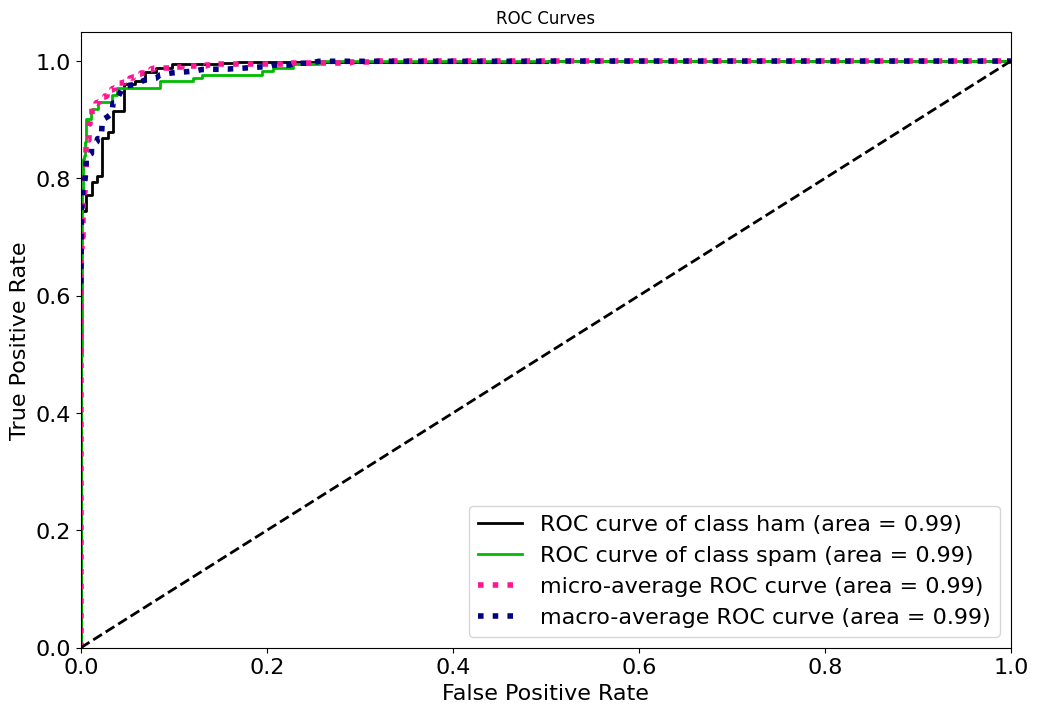

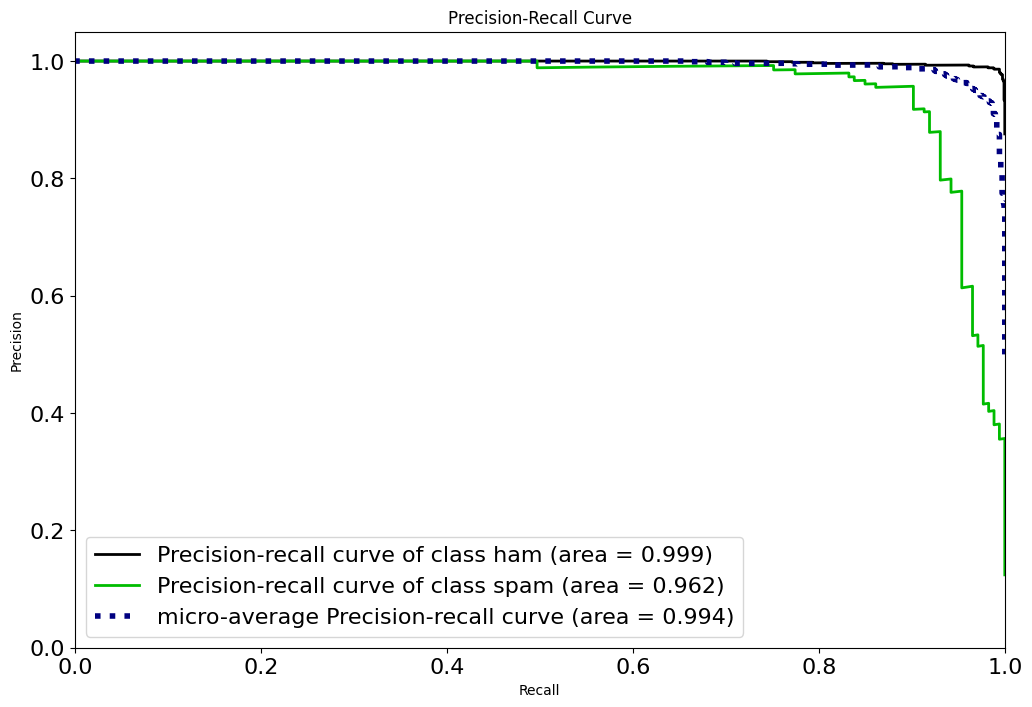

Confusion Matrix:
 [[1219    1]
 [  52  121]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1220
        spam       0.99      0.70      0.82       173

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393

Accuracy: 96.19526202440775
Training Score:
 97.00885379277338


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, X, y)

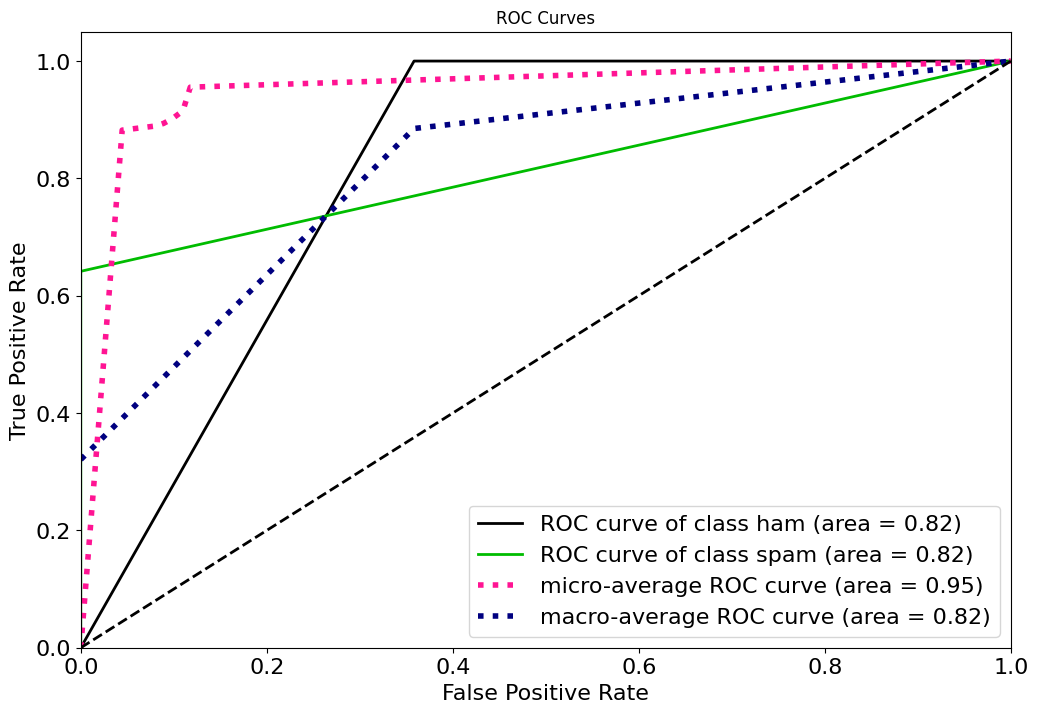

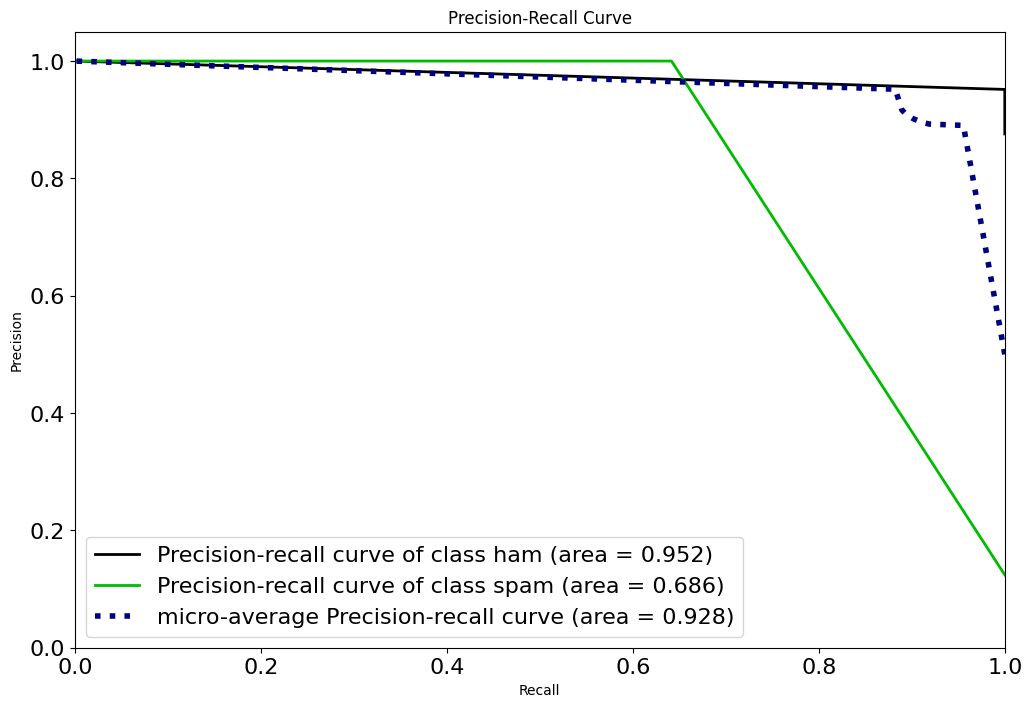

Confusion Matrix:
 [[1220    0]
 [ 137   36]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1220
        spam       1.00      0.21      0.34       173

    accuracy                           0.90      1393
   macro avg       0.95      0.60      0.65      1393
weighted avg       0.91      0.90      0.87      1393

Accuracy: 90.1651112706389
Training Score:
 90.45226130653266


In [53]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
Model(model,X,y)

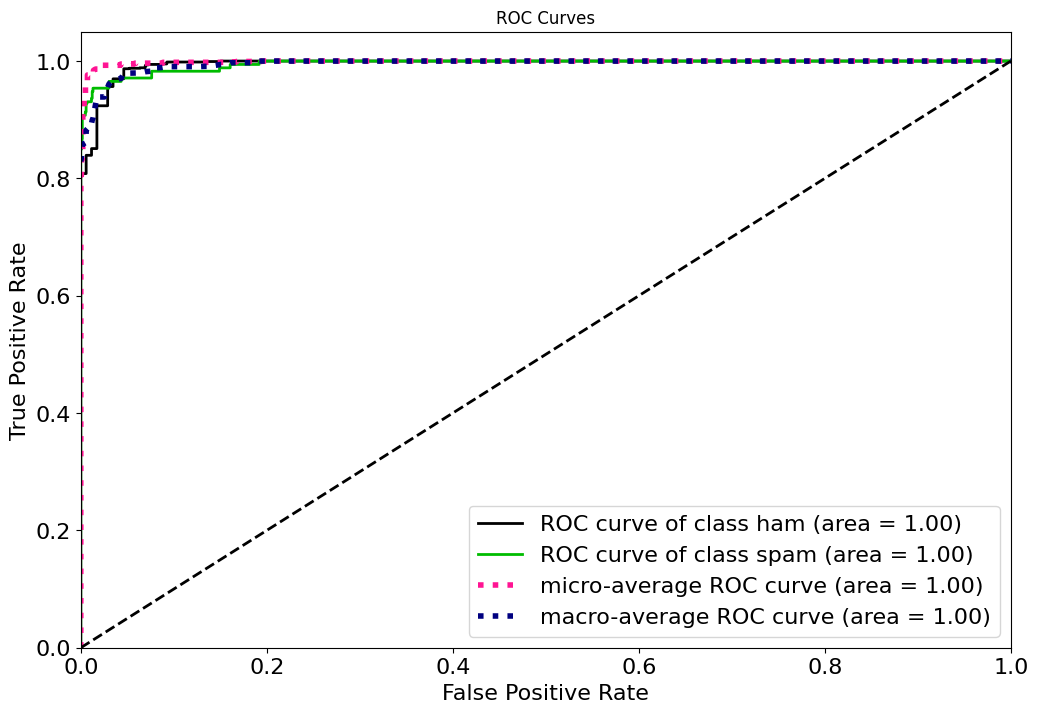

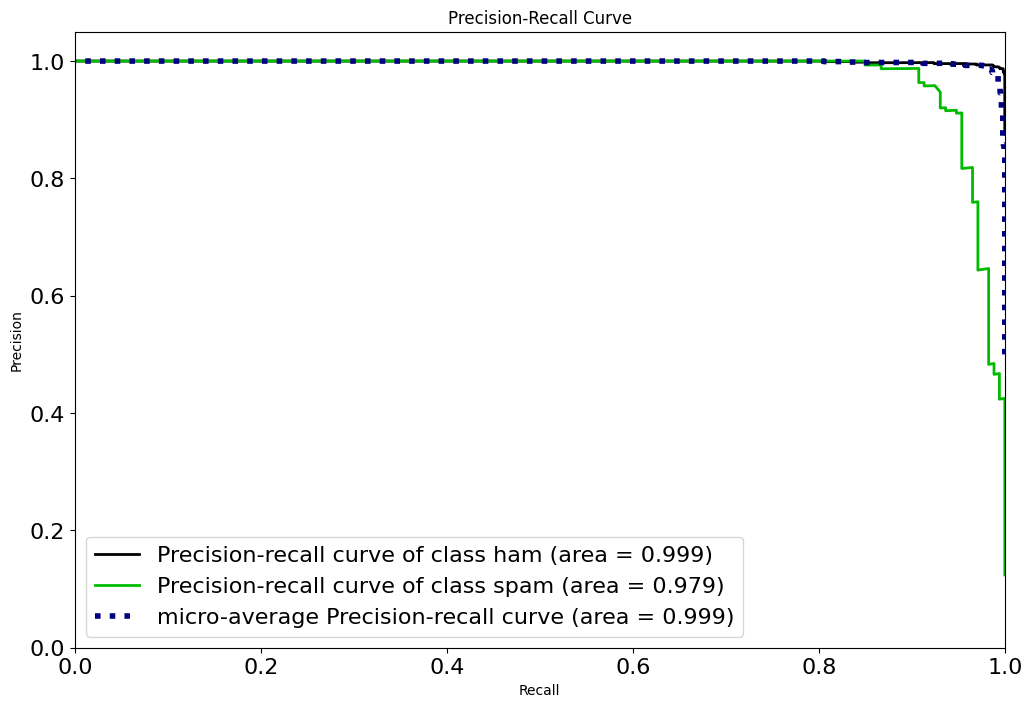

Confusion Matrix:
 [[1220    0]
 [  30  143]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       1.00      0.83      0.91       173

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy: 97.84637473079684
Training Score:
 99.83249581239531


In [54]:
from sklearn.svm import SVC
model = SVC(probability=True )
Model(model, X, y)

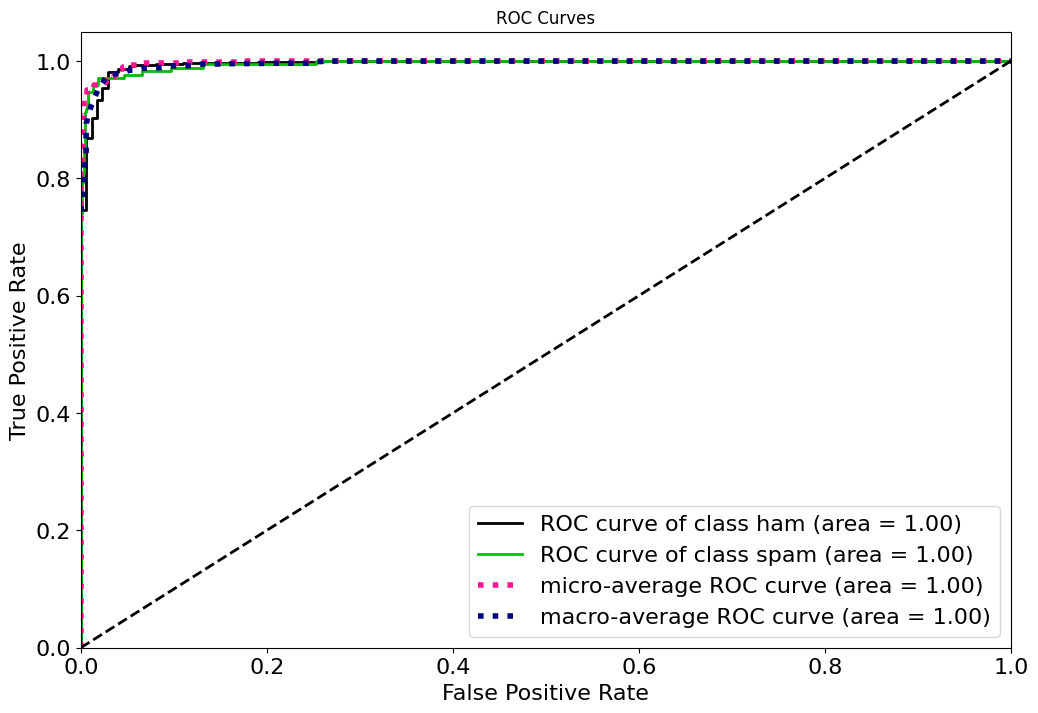

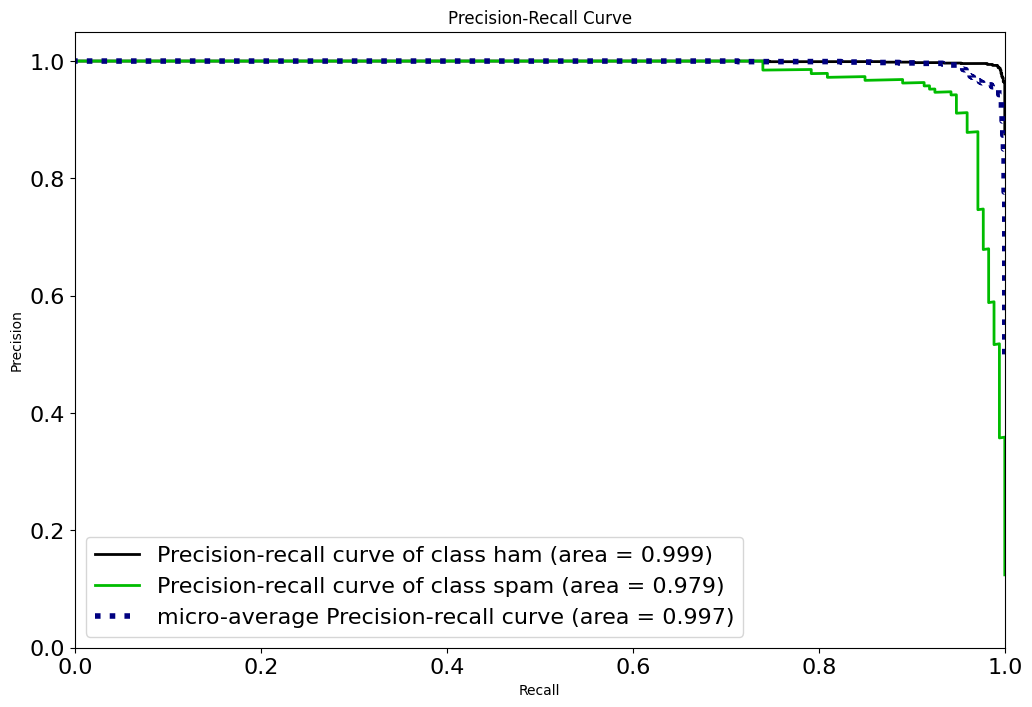

Confusion Matrix:
 [[1218    2]
 [  44  129]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.75      0.85       173

    accuracy                           0.97      1393
   macro avg       0.97      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393

Accuracy: 96.69777458722182
Training Score:
 98.82747068676717


In [55]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Model(model, X, y)

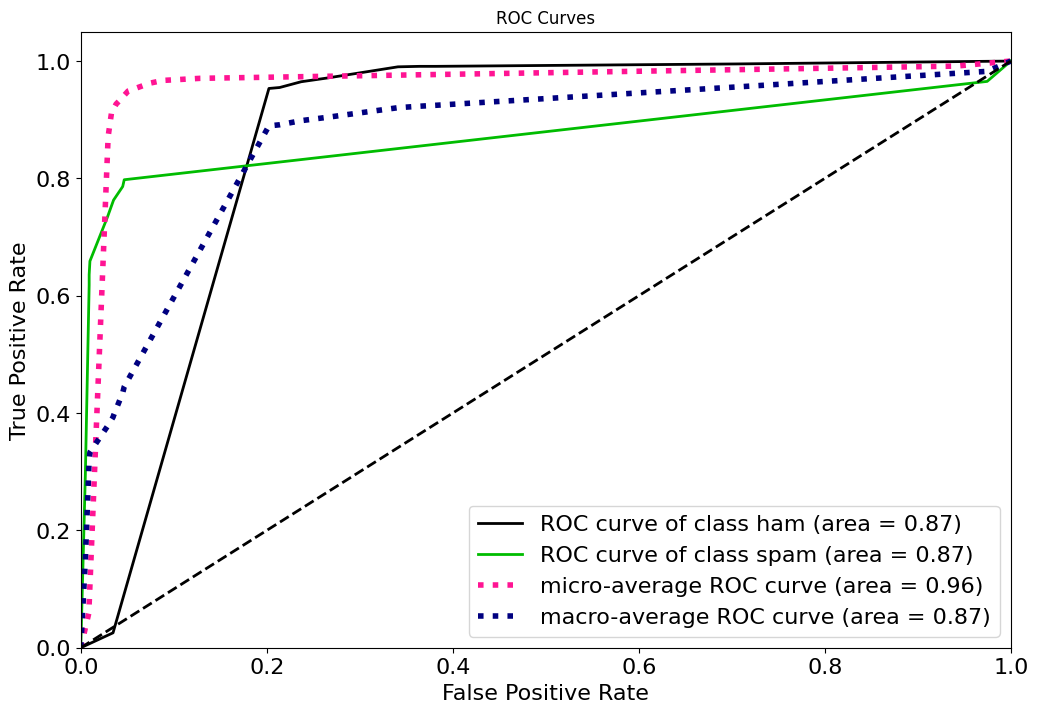

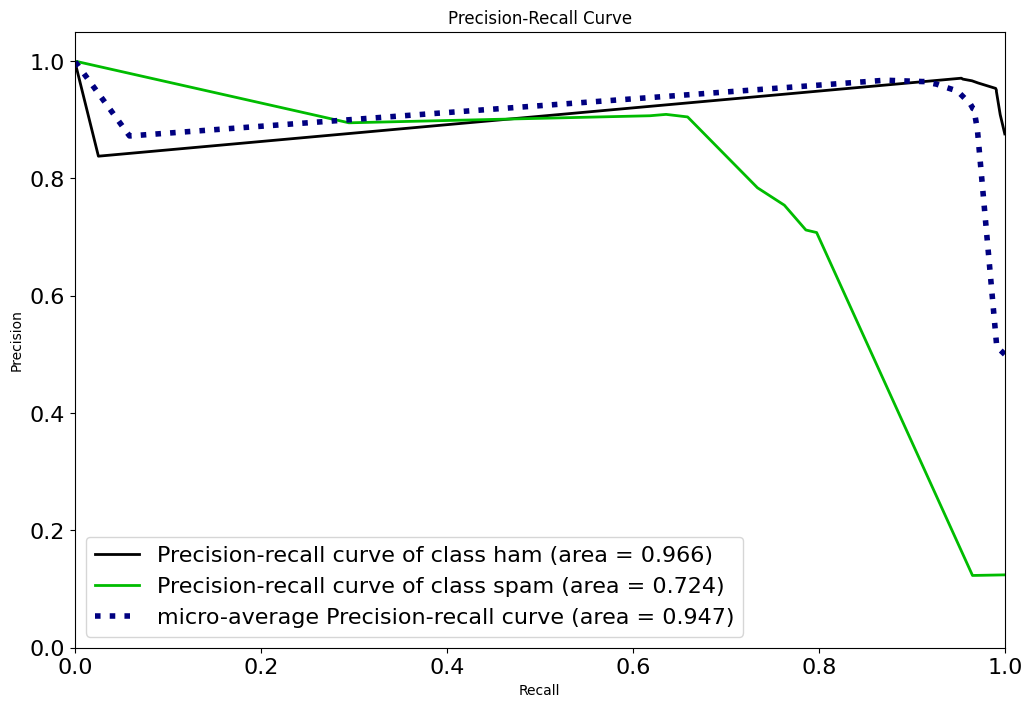

Confusion Matrix:
 [[1208   12]
 [  59  114]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1220
        spam       0.90      0.66      0.76       173

    accuracy                           0.95      1393
   macro avg       0.93      0.82      0.87      1393
weighted avg       0.95      0.95      0.95      1393

Accuracy: 94.90308686288586
Training Score:
 96.21919119406557


In [56]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(tree_clf,X,y)

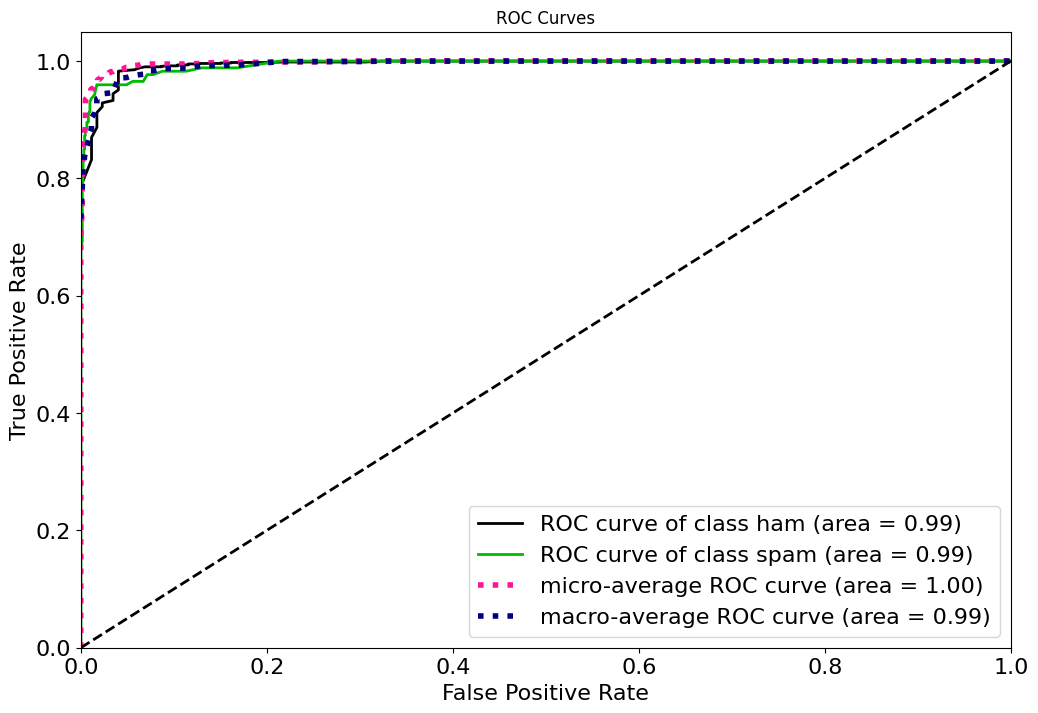

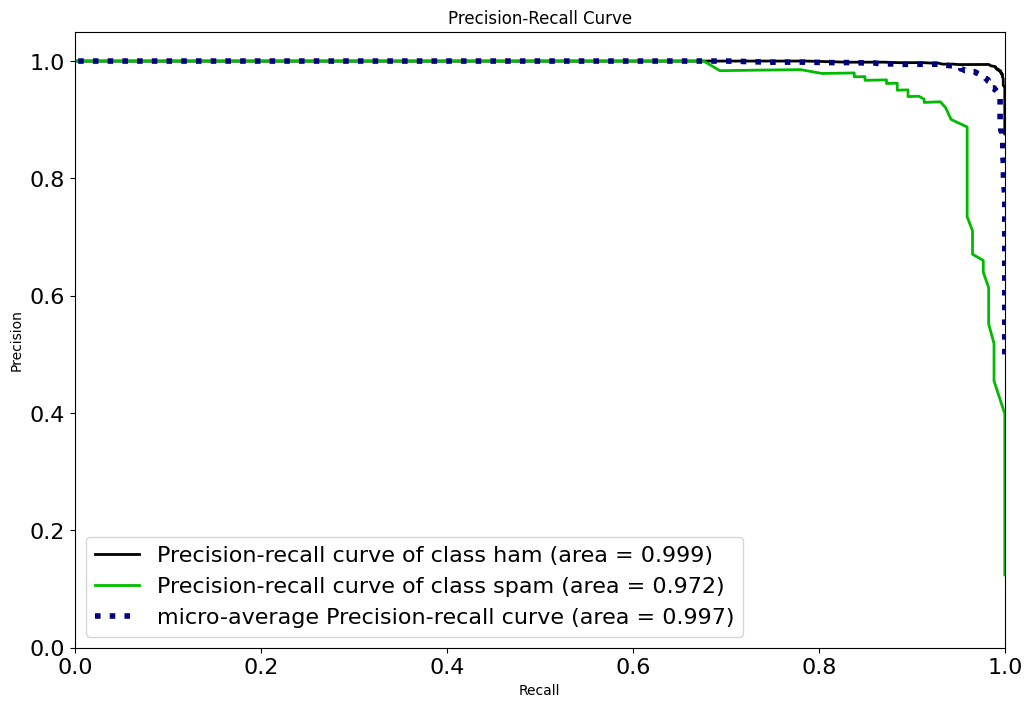

Confusion Matrix:
 [[1217    3]
 [  30  143]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       0.98      0.83      0.90       173

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393

Accuracy: 97.63101220387652
Training Score:
 100.0


In [57]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, X, y)